In [55]:
import pandas as pd

# You may need to change the path
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [56]:
train.head(20)

,id,description,ratingCategory
0,1321,"\nSometimes, when whisky is batched, a few lef...",1
1,3861,\nAn uncommon exclusive bottling of a 6 year o...,0
2,655,\nThis release is a port version of Amrut’s In...,1
3,555,\nThis 41 year old single cask was aged in a s...,1
4,1965,"\nQuite herbal on the nose, with aromas of dri...",1
5,3190,\nCooley produced some great Irish single malt...,1
6,3736,\nThis year’s Ardbeg Day bottling is named in ...,0
7,2643,\nAs part of a rebranding of the entire Talisk...,1
8,4817,\nMacQueen’s has an impressive range of age st...,0
9,4528,\nFull gold color. Layers of citrus fruit on t...,0


In [57]:
train['description'][0]

'\nSometimes, when whisky is batched, a few leftover barrels are returned to the warehouse. Canadian Club recently pulled and vatted several of these from the 1970s. Acetone, Granny Smith apples, and fresh-cut white cedar showcase this long age. Complex and spicy, yet reserved, this dram is ripe with strawberries, canned pears, cloves, pepper, and faint flowers, then slightly pulling oak tannins. Distinct, elegant, and remarkably vibrant, this ancient Canadian Club is anything but tired. (Australia only)\xa0A$133'

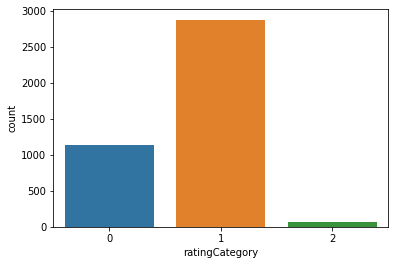

In [58]:
import seaborn as sns

sns.countplot(x=train['ratingCategory']);

In [59]:
train['ratingCategory'].value_counts()

1    2881
0    1141
2      65
Name: ratingCategory, dtype: int64

In [60]:
train['description']

0       \nSometimes, when whisky is batched, a few lef...
1       \nAn uncommon exclusive bottling of a 6 year o...
2       \nThis release is a port version of Amrut’s In...
3       \nThis 41 year old single cask was aged in a s...
4       \nQuite herbal on the nose, with aromas of dri...
                              ...                        
4082    \nWhat lies beneath the surface of Dewar’s? He...
4083    \nAfter 6 to 7 years of maturation in bourbon ...
4084    \nBright, delicate, and approachable. While no...
4085    \nI’m calling this the pitmaster’s dram: the n...
4086    \nSpicy sultanas, greengage plums, toffee, and...
Name: description, Length: 4087, dtype: object

In [61]:
##stripping the \n from test and train sets

train['description'] = train['description'].str.strip()
test['description'] = test['description'].str.strip()

In [62]:
train['description']

0       Sometimes, when whisky is batched, a few lefto...
1       An uncommon exclusive bottling of a 6 year old...
2       This release is a port version of Amrut’s Inte...
3       This 41 year old single cask was aged in a she...
4       Quite herbal on the nose, with aromas of dried...
                              ...                        
4082    What lies beneath the surface of Dewar’s? Here...
4083    After 6 to 7 years of maturation in bourbon ca...
4084    Bright, delicate, and approachable. While not ...
4085    I’m calling this the pitmaster’s dram: the nos...
4086    Spicy sultanas, greengage plums, toffee, and n...
Name: description, Length: 4087, dtype: object

In [63]:
######### pipeline components

In [64]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [65]:
doc1 = nlp(train['description'][10])
len(doc1)
#
#for token in doc:
 #   print(token.text)

96

In [66]:
doc1 = nlp(train['description'][10])
len(doc1)

96

In [67]:
from spacy.tokenizer import Tokenizer

tokenizer = Tokenizer(nlp.vocab)

tokens = []

for doc in tokenizer.pipe(train['description'], batch_size=500):
    doc_tokens = [token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)]
    tokens.append(doc_tokens)

train['tokens'] = tokens

In [68]:
train['tokens'][0]

['Sometimes,',
 'whisky',
 'batched,',
 'leftover',
 'barrel',
 'return',
 'warehouse.',
 'Canadian',
 'Club',
 'recently',
 'pull',
 'vatted',
 '1970s.',
 'Acetone,',
 'Granny',
 'Smith',
 'apples,',
 'fresh-cut',
 'white',
 'cedar',
 'showcase',
 'long',
 'age.',
 'Complex',
 'spicy,',
 'reserved,',
 'dram',
 'ripe',
 'strawberries,',
 'can',
 'pears,',
 'cloves,',
 'pepper,',
 'faint',
 'flowers,',
 'slightly',
 'pull',
 'oak',
 'tannins.',
 'Distinct,',
 'elegant,',
 'remarkably',
 'vibrant,',
 'ancient',
 'Canadian',
 'Club',
 'tired.',
 '(Australia',
 'only)',
 '\xa0',
 'A$133']

In [69]:
tokenizer = Tokenizer(nlp.vocab)

tokens = []

for doc in tokenizer.pipe(test['description'], batch_size=500):
    doc_tokens = [token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)]
    tokens.append(doc_tokens)

test['tokens'] = tokens

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [71]:
desc_data=train['description']

In [72]:
#train['tokens'][0]

In [73]:
vect.fit(desc_data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [74]:
dtm = vect.transform(desc_data)

In [75]:
dtm

<4087x12974 sparse matrix of type '<class 'numpy.int64'>'
	with 230675 stored elements in Compressed Sparse Row format>

In [76]:
train

,id,description,ratingCategory,tokens
0,1321,"Sometimes, when whisky is batched, a few lefto...",1,"[Sometimes,, whisky, batched,, leftover, barre..."
1,3861,An uncommon exclusive bottling of a 6 year old...,0,"[uncommon, exclusive, bottle, 6, year, old, ca..."
2,655,This release is a port version of Amrut’s Inte...,1,"[release, port, version, Amrut’s, Intermediate..."
3,555,This 41 year old single cask was aged in a she...,1,"[41, year, old, single, cask, age, sherry, but..."
4,1965,"Quite herbal on the nose, with aromas of dried...",1,"[herbal, nose,, aroma, dry, tarragon,, parsley..."
...,...,...,...,...
4082,3342,What lies beneath the surface of Dewar’s? Here...,1,"[lie, beneath, surface, Dewar’s?, Here,, blend..."
4083,3130,After 6 to 7 years of maturation in bourbon ca...,1,"[6, 7, year, maturation, bourbon, casks,, spen..."
4084,2811,"Bright, delicate, and approachable. While not ...",1,"[Bright,, delicate,, approachable., showstoppe..."
4085,478,I’m calling this the pitmaster’s dram: the nos...,1,"[I’m, call, pitmaster’s, dram:, nose, muscular..."


In [77]:
dtm.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [78]:
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm

,00,000,005,006,011,020,028,035,0473,048,...,zings,zingy,zip,zipping,zippy,zombies,zone,zuidam,ànima,ìle
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
top_20_words = dtm.sum().sort_values(ascending=False).head(20)
top_20_words

and        15817
the        13767
of          8126
with        6394
in          4692
is          4212
this        3243
to          3009
on          2955
it          2894
finish      2598
oak         2175
palate      2028
nose        1871
sweet       1804
but         1774
notes       1757
vanilla     1743
whisky      1487
fruit       1459
dtype: int64

In [80]:
#train['description'] = train['description'].str.replace('a', '')

In [81]:
train['description'][0]

'Sometimes, when whisky is batched, a few leftover barrels are returned to the warehouse. Canadian Club recently pulled and vatted several of these from the 1970s. Acetone, Granny Smith apples, and fresh-cut white cedar showcase this long age. Complex and spicy, yet reserved, this dram is ripe with strawberries, canned pears, cloves, pepper, and faint flowers, then slightly pulling oak tannins. Distinct, elegant, and remarkably vibrant, this ancient Canadian Club is anything but tired. (Australia only)\xa0A$133'

In [82]:
train['tokens']

0       [Sometimes,, whisky, batched,, leftover, barre...
1       [uncommon, exclusive, bottle, 6, year, old, ca...
2       [release, port, version, Amrut’s, Intermediate...
3       [41, year, old, single, cask, age, sherry, but...
4       [herbal, nose,, aroma, dry, tarragon,, parsley...
                              ...                        
4082    [lie, beneath, surface, Dewar’s?, Here,, blend...
4083    [6, 7, year, maturation, bourbon, casks,, spen...
4084    [Bright,, delicate,, approachable., showstoppe...
4085    [I’m, call, pitmaster’s, dram:, nose, muscular...
4086    [Spicy, sultanas,, greengage, plums,, toffee,,...
Name: tokens, Length: 4087, dtype: object

In [83]:
test['tokens']

0       [Style:, Speyside, single, malt, scotch, Color...
1       [bright, lively,, nice, balance, flavors., Zes...
2       [new, oloroso-forward, Chivas, position, split...
3       [Aged, bourbon, cask, enhance, Rioja, wine, ca...
4       [freshness, wood, nose,, lace, caramel, delica...
                              ...                        
1017    [Care, small, batch,, bourbon-matured, blend, ...
1018    [pick, bunch,, whisky, equivalent, Fountains, ...
1019    [Port, Ellen,, sure!, old-fashioned, nature:, ...
1020    [Youthful, lively., Bold,, crisp,, spice, (min...
1021    [mashbill, 60/20/10/10, corn/wheat/rye/malt,, ...
Name: tokens, Length: 1022, dtype: object

In [84]:
def get_word_vectors(docs):
    return [nlp(doc).vector for doc in docs]

In [85]:
#def get_word_vectors(docs):
   # return [nlp(doc).vector for doc in docs]

In [86]:
#train

In [87]:
#test

In [88]:
type(train['tokens'][0][0])

str

In [89]:
def condense(text):
    string1 = ""
    for x in text:
        string1 = string1 + " " + x
    return string1  

In [90]:
condense(train['tokens'][0])

' Sometimes, whisky batched, leftover barrel return warehouse. Canadian Club recently pull vatted 1970s. Acetone, Granny Smith apples, fresh-cut white cedar showcase long age. Complex spicy, reserved, dram ripe strawberries, can pears, cloves, pepper, faint flowers, slightly pull oak tannins. Distinct, elegant, remarkably vibrant, ancient Canadian Club tired. (Australia only) \xa0 A$133'

In [91]:
#string1

In [92]:
train['tokens'] = train['tokens'].apply(condense)

In [93]:
test['tokens'] = test['tokens'].apply(condense)

In [94]:
train['tokens']

0        Sometimes, whisky batched, leftover barrel re...
1        uncommon exclusive bottle 6 year old cask str...
2        release port version Amrut’s Intermediate She...
3        41 year old single cask age sherry butt inter...
4        herbal nose, aroma dry tarragon, parsley, dil...
                              ...                        
4082     lie beneath surface Dewar’s? Here, blend fini...
4083     6 7 year maturation bourbon casks, spend mont...
4084     Bright, delicate, approachable. showstopper, ...
4085     I’m call pitmaster’s dram: nose muscular peat...
4086     Spicy sultanas, greengage plums, toffee, new ...
Name: tokens, Length: 4087, dtype: object

In [95]:
test['tokens']

0        Style: Speyside single malt scotch Color: Wal...
1        bright lively, nice balance flavors. Zesty fr...
2        new oloroso-forward Chivas position split 12 ...
3        Aged bourbon cask enhance Rioja wine casks. m...
4        freshness wood nose, lace caramel delicate mi...
                              ...                        
1017     Care small batch, bourbon-matured blend 20% m...
1018     pick bunch, whisky equivalent Fountains Wayne...
1019     Port Ellen, sure! old-fashioned nature: inter...
1020     Youthful lively. Bold, crisp, spice (mint, ci...
1021     mashbill 60/20/10/10 corn/wheat/rye/malt, age...
Name: tokens, Length: 1022, dtype: object

In [115]:
X = get_word_vectors(train['tokens'])

In [116]:
len(X)

4087

In [98]:
#X = get_word_vectors(train['tokens'])

In [117]:
len(X)

4087

In [118]:
len(train['description'])

4087

In [101]:
X_test = get_word_vectors(test['tokens'])

In [119]:
len(X_test)==len(test['tokens'])

True

In [170]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier


from scipy.stats import randint

In [160]:
clf = RandomForestClassifier()
#clf = XGBClassifier()


In [161]:
import numpy as np


In [162]:
type(X)

list

In [150]:
#np.shape(X)

In [163]:
train['ratingCategory'].shape

(4087,)

In [164]:
clf.fit(X, train['ratingCategory'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [165]:
clf.score(X, train['ratingCategory'])

1.0

In [166]:
clf.predict(X_test)

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
#Now doing doing a grid search to optimize hyperparameters

In [167]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('clf', clf)])

In [168]:
parameters = {
    #'vect__max_df': ( 0.75, 1.0),
    #'vect__min_df': (.02, .05),
    #'vect__max_features': (500,1000),
    #'clf__max_depth':(10,15,20),
    'clf__max_depth':(5,10,15,20),
    'clf__min_samples_leaf':(1,2,3),
    'clf__n_estimators':(100,200)
}

In [ ]:
%time
grid_search = GridSearchCV(pipe, parameters, cv=10, n_jobs=-1, verbose=1)
grid_search.fit(X, train['ratingCategory'])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   43.1s


In [ ]:
grid_search.best_estimator_

In [ ]:
#best_estimator
'''
bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=200, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
                                        
                                        
                                        
                                        
                                        
                                        
                                        
                                        ipeline(memory=None,
         steps=[('clf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=20, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=2, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)
'''

In [ ]:
(grid_search.best_score_*100).round(2)

In [ ]:
### Record of best scores
#0.7359915966638038
#73.62
#73.5

In [ ]:
### This exports to a kaggle submission

In [ ]:
pred = grid_search.predict(X_test)

In [ ]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [ ]:
submission.head()

In [ ]:
submission['ratingCategory'].value_counts()

In [ ]:
subNumber = 10

In [ ]:

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

In [ ]:
###Do some exploratory visualizations to see what stop words I could add to my tfidf vectorizer

In [ ]:
#######

In [ ]:
###############################

Practice Problems
Use your own Data Set

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques:

Lemmatization Custom stopword removal Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions.

Overall Word / Token Count View Counts by Rating

[ ]
Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

[ ]
Use Spacy to tokenize the listings

[ ]
Use Scikit-Learn's CountVectorizer to get word counts

[ ]
Visualize the most common word counts

[ ]
Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

[ ]
Create a NearestNeighbor Model.

[ ]
Try different visualizations for words and frequencies

[ ]
Fit a Gensim LDA topic model